# Setting and running a workflow

In this notebook, we will see how to perform a streamlined cluster analysis on a trajectory using the `Workflow` class.

A workflow is a succession of steps to perform a cluster analysis:

1. The computation of a structural descriptor on a given trajectory.
2. An *optional* [feature scaling](https://en.wikipedia.org/wiki/Feature_scaling) on the structural features associated to the selected descriptor.
3. An *optional* [dimensionality reduction](https://en.wikipedia.org/wiki/Dimensionality_reduction) on the raw/rescaled structural features (depending on step **2.**).
4. The execution of a [clustering](https://en.wikipedia.org/wiki/Cluster_analysis) algorithm on the structural features to partition the particles into structurally different clusters.

## The simplest workflow

The `Workflow` class provides the most straightforward way to perform a spatial clustering of a system.

In its simplest form, this class only requires one positional argument in order to be instantiated: the path to a trajectory file in a supported format or an instance of `Trajectory` (see the [previous notebook](1_trajectory.html) for details about trajectories).

Here we analyze a trajectory obtained from the simulation of a Lennard-Jones binary mixture, known as a [Kob-Andersen](https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.73.1376) mixture:

In [1]:
from partycls import Workflow

wf = Workflow('../data/kalj_N150.xyz')
wf.run()

This is the shortest possible script to run a workflow: we first open a trajectory file through the `Workflow` class, and use the default parameters to perform each step of the analysis. 

Each step can be customized using the following parameters, when instantiating the workflow:

1. `descriptor`: the type of structural descriptor to use to perform the clustering (see the [next notebook](3_descriptors.html) and the detailed presentation of each descriptor in the documentation).
    
    This argument must either be a short string or an instance of `StructuralDescriptor` (see the [partycls.descriptor](../../source/partycls.descriptors.html) package). The default value is set to `"gr"`, which is the symbol of the `RadialDescriptor` class. All compatible string aliases are stored in the class attribute `descriptor_db`:

In [2]:
print("Available string aliases for descriptors:")
for alias, desc in Workflow.descriptor_db.items():
    print(f'- "{alias}": {desc}')

Available string aliases for descriptors:
- "gr": <class 'partycls.descriptors.radial.RadialDescriptor'>
- "rad": <class 'partycls.descriptors.radial.RadialDescriptor'>
- "radial": <class 'partycls.descriptors.radial.RadialDescriptor'>
- "ba": <class 'partycls.descriptors.ba.BondAngleDescriptor'>
- "ang": <class 'partycls.descriptors.ba.BondAngleDescriptor'>
- "angular": <class 'partycls.descriptors.ba.BondAngleDescriptor'>
- "sbo": <class 'partycls.descriptors.smoothed_bo.SmoothedBondOrientationalDescriptor'>
- "bo": <class 'partycls.descriptors.bo.BondOrientationalDescriptor'>
- "boo": <class 'partycls.descriptors.bo.BondOrientationalDescriptor'>
- "bop": <class 'partycls.descriptors.bo.BondOrientationalDescriptor'>
- "steinhardt": <class 'partycls.descriptors.bo.SteinhardtDescriptor'>
- "labo": <class 'partycls.descriptors.averaged_bo.LocallyAveragedBondOrientationalDescriptor'>
- "ld": <class 'partycls.descriptors.averaged_bo.LechnerDellagoDescriptor'>
- "lechner-dellago": <class '

2. `scaling`: type of feature scaling to apply on the data. Default is `None`, but a short string (*e.g.* `"zscore"` or `"minmax"`) or an instance of the associated classes is also accepted (see the [partycls.feature_scaling](../../source/partycls.html#module-partycls.feature_scaling) module). All compatible string aliases are stored in the class attribute `scaling_db`:

In [3]:
print("Available string aliases for feature scaling:")
for alias, scaling in Workflow.scaling_db.items():
    print(f'- "{alias}": {scaling}')

Available string aliases for feature scaling:
- "standard": <class 'partycls.feature_scaling.ZScore'>
- "zscore": <class 'partycls.feature_scaling.ZScore'>
- "z-score": <class 'partycls.feature_scaling.ZScore'>
- "minmax": <class 'partycls.feature_scaling.MinMax'>
- "min-max": <class 'partycls.feature_scaling.MinMax'>
- "maxabs": <class 'partycls.feature_scaling.MaxAbs'>
- "max-abs": <class 'partycls.feature_scaling.MaxAbs'>
- "robust": <class 'partycls.feature_scaling.Robust'>


3. `dim_reduction`: dimensionality reduction method. Default value is `None`, but a short string (*e.g.* `"pca"` or `"tsne"`) or an instance of the associated classes is also accepted (see the [partycls.dim_reduction](../../source/partycls.html#module-partycls.dim_reduction) module). All compatible string aliases are stored in the class attribute `dim_reduction_db`:

In [4]:
print("Available string aliases for dim. reduction:")
for alias, redux in Workflow.dim_reduction_db.items():
    print(f'- "{alias}": {redux}')

Available string aliases for dim. reduction:
- "pca": <class 'partycls.dim_reduction.PCA'>
- "tsne": <class 'partycls.dim_reduction.TSNE'>
- "t-sne": <class 'partycls.dim_reduction.TSNE'>
- "lle": <class 'partycls.dim_reduction.LocallyLinearEmbedding'>
- "autoencoder": <class 'partycls.dim_reduction.AutoEncoder'>
- "auto-encoder": <class 'partycls.dim_reduction.AutoEncoder'>
- "ae": <class 'partycls.dim_reduction.AutoEncoder'>


4. `clustering`: clustering algorithm. Default is `"kmeans"`, but other short strings (*e.g.* `"gmm"` or `"cinf"`) or an instance of the associated classes is also accepted (see the [partycls.clustering](../../source/partycls.html#module-partycls.clustering) module). All compatible string aliases are stored in the class attribute `clustering_db`:

In [5]:
print("Available string aliases for dim. reduction:")
for alias, cls in Workflow.clustering_db.items():
    print(f'- "{alias}": {cls}')

Available string aliases for dim. reduction:
- "k-means": <class 'partycls.clustering.KMeans'>
- "kmeans": <class 'partycls.clustering.KMeans'>
- "gaussian mixture": <class 'partycls.clustering.GaussianMixture'>
- "gaussian-mixture": <class 'partycls.clustering.GaussianMixture'>
- "gmm": <class 'partycls.clustering.GaussianMixture'>
- "gm": <class 'partycls.clustering.GaussianMixture'>
- "community inference": <class 'partycls.clustering.CommunityInference'>
- "community-inference": <class 'partycls.clustering.CommunityInference'>
- "inference": <class 'partycls.clustering.CommunityInference'>
- "cinf": <class 'partycls.clustering.CommunityInference'>


In summary, with the three lines of code in cell **[1]**, we used the radial distribution of the particles to form clusters using the K-Means algorithm (no feature scaling or dimensionality reduction by default).

Let us now have a look at the bulk *unnormalized* radial distribution, and the distributions restricted to the clusters:

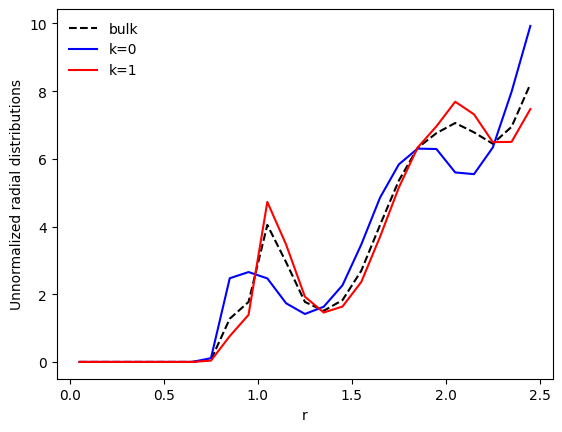

In [6]:
import matplotlib.pyplot as plt

# Grid and average distribution
r = wf.descriptor.grid
p_r = wf.descriptor.average

# Dataset: all the individual radial distributions of the particles
data = wf.descriptor.features
# Distributions of the clusters
pk_r = wf.clustering.centroids(data)

# Plot
plt.plot(r, p_r, c='k', ls='--', label='bulk')
plt.plot(r, pk_r[0], c='b', label='k=0')
plt.plot(r, pk_r[1], c='r', label='k=1')
plt.xlabel('r')
plt.ylabel('Unnormalized radial distributions')
plt.legend(frameon=False)
plt.show()

<div class="alert alert-info">
    Notes
    
    <ul>
    <li>`descriptor.average` refers to the average feature vector of all the samples (*i.e.* particles) in the dataset. In this example, this is the average radial distribution of the particles.</li>
    
    <li>`clustering.centroids` are the coordinates of the cluster centers for the dataset `data`. This is the average feature vector of all the samples that belong to this cluster. In this example, the average radial distribution of the clusters.</li>
    </ul>
</div>

We see that the bulk distribution (dashed line) has been split into two distinctive distributions. Let us have a look at a more common quantity: the radial distribution function (RDF), $g(r)$.

The class `RadialDescriptor`, which is the default descriptor used here, implements a normalization method `normalize()` that allows for two types of normalizations specified by a parameter `method`:

* `method='r2'` returns $r^2g(r)$ (default) ;
* `method='gr'` returns the standard $g(r)$ ;

Let us look at the standard $g(r)$:

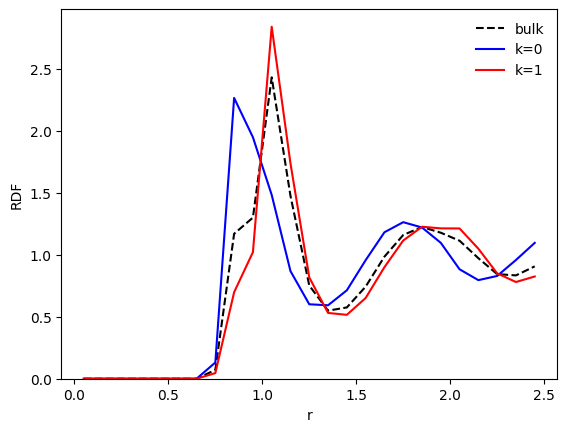

In [7]:
# Normalized g(r)
g_r = wf.descriptor.normalize(p_r, method='gr')
g0_r = wf.descriptor.normalize(pk_r[0], method='gr')
g1_r = wf.descriptor.normalize(pk_r[1], method='gr')

# Plot normalized g(r)
plt.plot(r, g_r, c='k', ls='--', label='bulk')
plt.plot(r, g0_r, c='b', label='k=0')
plt.plot(r, g1_r, c='r', label='k=1')
plt.xlabel('r')
plt.ylabel('RDF')
plt.ylim(bottom=0)
plt.legend(frameon=False)
plt.show()

The numbers, fractions and labels of the clusters are accessible through the following attributes:

In [8]:
print('Populations:', wf.populations)
print('Fractions;', wf.fractions)
print('Labels:', wf.labels)

Populations: [ 4560 10590]
Fractions; [0.3009901 0.6990099]
Labels: [1 1 1 ... 0 0 0]


## Output files

Unless disabled with the `wf.disable_output()` method, a set output files is written once the cluster analysis is complete. Some are written by default while some need to be enabled. The available output files are:

* `"trajectory"`: a trajectory file with an additional column for the clusters' labels (if the output format allows it).
* `"log"`: a log file with all the relevant information about the cluster analysis.
* `"centroids"`: a data file with the centroids of the clusters, using the *raw* features from the descriptor.
* `"labels"`: a text file with the clusters' labels only.
* `"dataset"`: a data file with the *raw* features from the descriptor.

All the information regarding output files is stored in the instance attribute `output_metadata` (dictionary):

In [9]:
# All possible types output files
print(wf.output_metadata.keys())

dict_keys(['trajectory', 'log', 'centroids', 'labels', 'dataset'])


Each of these files has its specific options. For instance, the options for the output trajectory file are:

In [10]:
# Options for the output trajectory
print("All options:\n", wf.output_metadata['trajectory'].keys())

# Default values of some options
print('\nEnable output:', wf.output_metadata['trajectory']['enable'])
print('\nOutput format:', wf.output_metadata['trajectory']['fmt'])

All options:
 dict_keys(['enable', 'writer', 'filename', 'fmt', 'backend', 'additional_fields', 'precision'])

Enable output: True

Output format: xyz


Output metadata can be changed through the method `set_output_metadata()`. For instance:

In [11]:
wf.set_output_metadata('trajectory',
                       filename='my_traj.xyz.gz',
                       fmt='rumd')

If no `filename` is provided for the output files, a default naming convention will be used. 

The default naming convention of every file is defined by the attribute `wf.naming_convention`:

In [12]:
print(wf.naming_convention)

{filename}.{code}.{descriptor}.{clustering}


Each tag in the previous string will be replaced by its value in the current instance of `Worfklow`. This naming convention can be changed by using any combination of the following tags:

- `{filename}`: name of the input trajectory file.
- `{code}`: extension for files produced by *partycls*.
- `{descriptor}`: descriptor used.
- `{scaling}`: feature scaling method used.
- `{dim_reduction}`: dimensionality reduction method used.
- `{clustering}`: clustering method used.

In our example, setting

In [13]:
wf.naming_convention = "{filename}_{clustering}_{descriptor}"

would create output files with the following names:

- `kalj_N150.xyz_kmeans_gr.log`.
- `kalj_N150.xyz_kmeans_gr.dataset`.
- Etc.

## A customized workflow

Let us now look at a more complex example, where the `Workflow` is fully customized.

We consider a cubic crystal in which some particles have been dislocated from their original lattice positions:

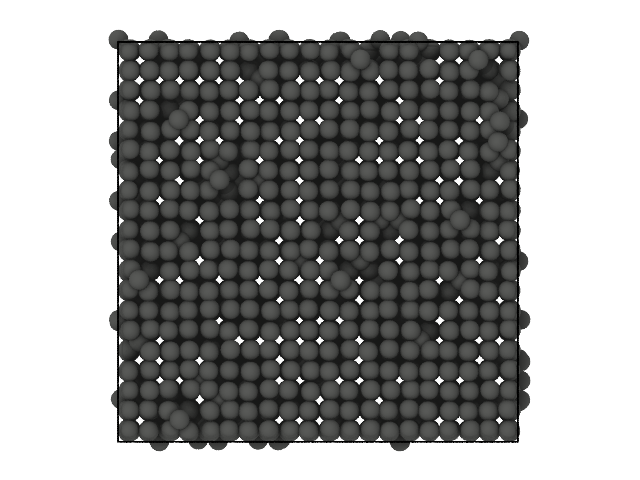

In [14]:
from partycls import Trajectory

# Load the trajectory
xtal_traj = Trajectory('../data/dislocation_N8000.xyz')

# Visualize the first (and only) frame
xtal_traj[0].show(backend='ovito')

We use simple angular correlations, a standard feature scaling method ([Z-score](https://en.wikipedia.org/wiki/Standard_score)) and a linear dimensionality reduction technique ([PCA](https://en.wikipedia.org/wiki/Principal_component_analysis)) to find the clusters:

In [15]:
from partycls.descriptors import BondAngleDescriptor
from partycls import PCA

# Bond-angle descriptor
D_ba = BondAngleDescriptor(xtal_traj)
X = D_ba.compute()

# Dimensionality reduction method
redux = PCA(n_components=2)

# Workflow
xtal_wf = Workflow(xtal_traj,
                   descriptor=D_ba,
                   scaling='zscore',
                   dim_reduction=redux,  
                   clustering='kmeans')
xtal_wf.clustering.n_init = 100 # clustering repetitions
xtal_wf.run()

<div class="alert alert-info">
    Note
    
    The raw features, rescaled features, and features in the reduced space are accesible through the attributes `features`, `scaled_features` and `reduced_features` respectively.
</div>

Let us look at the clusters in the 2D latent space corresponding to the two principal components the `PCA` instance with largest eigenvalues:

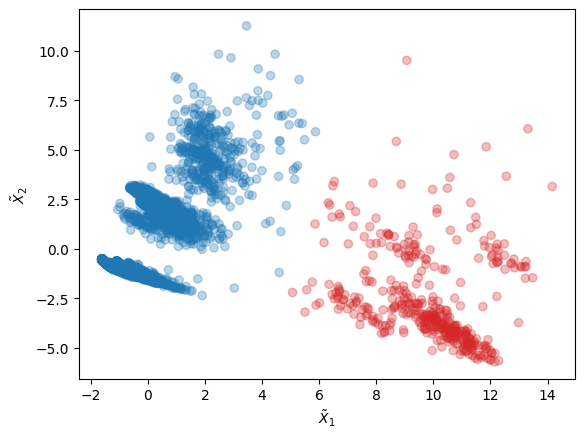

In [16]:
import numpy as np

# Features in latent space and labels
X_red = xtal_wf.reduced_features
labels = xtal_wf.labels

# Scatter plot of latent space with clusters' labels
c = np.array(['tab:blue', 'tab:red'])
plt.scatter(X_red[:,0], X_red[:,1], c=c[labels], alpha=0.3)
plt.xlabel(r"$\tilde{X}_1$")
plt.ylabel(r"$\tilde{X}_2$")
plt.show()

We now look at the centroids of the clusters (*i.e.* bond-angle distributions in our example):

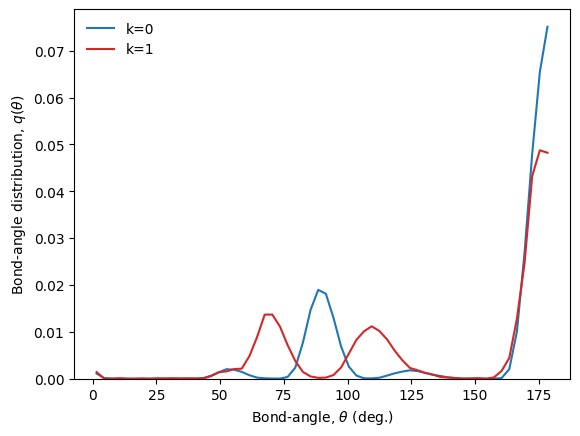

In [17]:
# Grid and centroids
theta = D_ba.grid
C_k = xtal_wf.clustering.centroids(X)

# Make centroids normalized bond angle distributions
q_0 = D_ba.normalize(C_k[0], method='pdf')
q_1 = D_ba.normalize(C_k[1], method='pdf')

# Bond-angle distributions
plt.plot(theta, q_0, c='tab:blue', label='k=0')
plt.plot(theta, q_1, c='tab:red', label='k=1')
plt.legend(frameon=False)
plt.xlabel('Bond-angle, ' + r'$\theta$' + ' (deg.)')
plt.ylabel('Bond-angle distribution, ' + r'$q(\theta)$')
plt.ylim(bottom=0)
plt.show()

This is what is expected: particles on the lattice dislocated particles belong to two different clusters.

We can verify this by looking at the clusters directly in real-space:

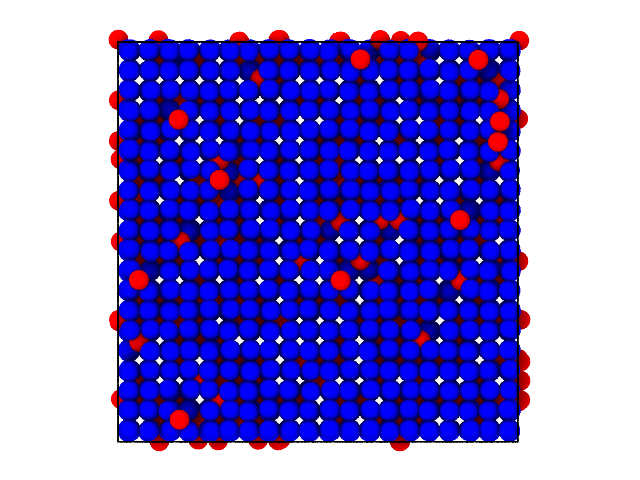

In [18]:
# Show the system with labels
xtal_traj[0].show(backend='ovito', color='label', palette=[(0,0,1), (1,0,0)])

Dislocated particles are colored differently from the crystal, as expected.